Simple Linear Regression model means only two variables, one independent and other dependent.

So that we will predict the line y = mx + c, trying to find out slope m and intercept c

Loading Housing Pricing dataset

In [29]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
df = load_boston()
df

/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Setting up input variable, capital X (Vector of independent variables)

X = pd.DataFrame(df.data)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
# Renaming the column names to feature actual names

X.columns = df.feature_names
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# Defining the output variable

y = df.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
#Defining Feature 
# note: For a single feature it is important to reshape it as a numpy 2D array

x1 = np.array(X["NOX"]).reshape((-1,1))
x1

array([[0.538 ],
       [0.469 ],
       [0.469 ],
       [0.458 ],
       [0.458 ],
       [0.458 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.499 ],
       [0.499 ],
       [0.499 ],
       [0.499 ],
       [0.428 ],
       [0.428 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.439 ],
       [0.439 ],
       [0.439 ],
       [0.439 ],
       [0.41  ],
       [0.403 ],
       [0.41  ],
       [0.411 ],
       [0.453 

In [7]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
# Doing train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.30, random_state=42)

X_train

# Here X_train and y_train will be used to train the data and X_test and y_test will be used to test the data, how 
# good the algorithm is working

# test size we have set up as 30 percent of the data will go for training of the model randomly
# random_state is a random number which selects the train data randomly.

array([[0.458 ],
       [0.547 ],
       [0.448 ],
       [0.538 ],
       [0.58  ],
       [0.77  ],
       [0.458 ],
       [0.693 ],
       [0.488 ],
       [0.453 ],
       [0.52  ],
       [0.493 ],
       [0.647 ],
       [0.538 ],
       [0.647 ],
       [0.614 ],
       [0.538 ],
       [0.524 ],
       [0.609 ],
       [0.52  ],
       [0.499 ],
       [0.605 ],
       [0.58  ],
       [0.547 ],
       [0.547 ],
       [0.51  ],
       [0.437 ],
       [0.464 ],
       [0.871 ],
       [0.668 ],
       [0.7   ],
       [0.77  ],
       [0.447 ],
       [0.507 ],
       [0.713 ],
       [0.624 ],
       [0.631 ],
       [0.409 ],
       [0.77  ],
       [0.605 ],
       [0.585 ],
       [0.693 ],
       [0.693 ],
       [0.401 ],
       [0.431 ],
       [0.52  ],
       [0.718 ],
       [0.871 ],
       [0.464 ],
       [0.871 ],
       [0.507 ],
       [0.472 ],
       [0.426 ],
       [0.431 ],
       [0.605 ],
       [0.605 ],
       [0.403 ],
       [0.504 ],
       [0.437 

Standardization, also known as z-score normalization, is a data preprocessing technique commonly used in statistics and machine learning to rescale a variable's values to have a mean of 0 and a standard deviation of 1. It is typically applied when you have multiple variables with different scales, and you want to ensure that they all contribute equally to a model's analysis.

However, when you have only one variable, standardization may not be necessary or useful because there are no other variables to compare it to. Standardization becomes valuable when you have multiple variables because it helps ensure that each variable's scale doesn't disproportionately influence the results of your analysis, particularly in algorithms that are sensitive to the scale of variables (e.g., gradient descent in machine learning).

In the case of a single variable, the decision to standardize depends on your specific analysis goals and the nature of the data. If the variable already has a meaningful and interpretable scale, or if you don't plan to compare it to other variables, you may not need to standardize it.

However, if you want to make the variable's values more interpretable or if you think it might be compared to other variables in the future, you can still standardize it. In this case, the mean will become 0, and the standard deviation will become 1, but this might not have a significant impact on your analysis when there's only one variable. It's generally a good practice to document any preprocessing steps you apply to your data, including standardization, to make your analysis more transparent and reproducible.

In [9]:
# Doing standarization of the input variable

## standarization of the input variables

from sklearn.preprocessing import StandardScaler

# intializing the scaler to a variable

scaler = StandardScaler()

# which essentially also called as z-score normalization

# scaling the training data independent variables

X_train = scaler.fit_transform(X_train)
X_train

array([[-0.85108479],
       [-0.08796708],
       [-0.93682836],
       [-0.16513629],
       [ 0.19498668],
       [ 1.82411437],
       [-0.85108479],
       [ 1.16388894],
       [-0.5938541 ],
       [-0.89395658],
       [-0.3194747 ],
       [-0.55098232],
       [ 0.76946855],
       [-0.16513629],
       [ 0.76946855],
       [ 0.48651479],
       [-0.16513629],
       [-0.28517728],
       [ 0.44364301],
       [-0.3194747 ],
       [-0.49953619],
       [ 0.40934558],
       [ 0.19498668],
       [-0.08796708],
       [-0.08796708],
       [-0.40521827],
       [-1.03114628],
       [-0.79963866],
       [ 2.69012436],
       [ 0.94953003],
       [ 1.22390943],
       [ 1.82411437],
       [-0.94540271],
       [-0.43094133],
       [ 1.33537606],
       [ 0.57225835],
       [ 0.63227885],
       [-1.27122825],
       [ 1.82411437],
       [ 0.40934558],
       [ 0.23785846],
       [ 1.16388894],
       [ 1.16388894],
       [-1.3398231 ],
       [-1.08259241],
       [-0

In [10]:
# By standard scaler, the mean should be zero lets see
X_train.mean()

-6.874601327622438e-16

In [11]:
# And standard deviation should be 1
X_train.std()

1.0

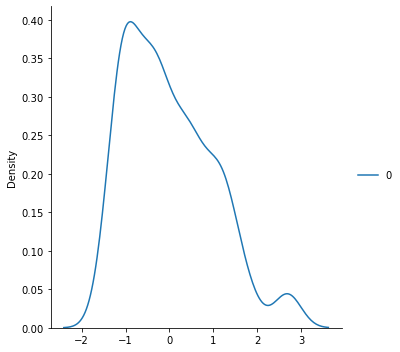

In [12]:
# Let us see the beautiful standard normal curve
import seaborn as sns
sns.displot(X_train, kind = 'kde')

In [13]:
# We will also need to reshaping the x_test

X_test = np.array(X_test).reshape((1,-1))
X_test

array([[0.51  , 0.447 , 0.609 , 0.413 , 0.713 , 0.437 , 0.544 , 0.624 ,
        0.532 , 0.585 , 0.55  , 0.524 , 0.693 , 0.437 , 0.493 , 0.614 ,
        0.581 , 0.7   , 0.422 , 0.713 , 0.464 , 0.447 , 0.538 , 0.573 ,
        0.718 , 0.584 , 0.437 , 0.713 , 0.489 , 0.585 , 0.51  , 0.493 ,
        0.671 , 0.77  , 0.584 , 0.871 , 0.469 , 0.515 , 0.489 , 0.413 ,
        0.585 , 0.472 , 0.4161, 0.409 , 0.489 , 0.7   , 0.538 , 0.413 ,
        0.58  , 0.538 , 0.524 , 0.4429, 0.538 , 0.52  , 0.575 , 0.583 ,
        0.74  , 0.411 , 0.449 , 0.431 , 0.453 , 0.403 , 0.504 , 0.538 ,
        0.411 , 0.489 , 0.693 , 0.426 , 0.428 , 0.713 , 0.448 , 0.532 ,
        0.74  , 0.413 , 0.437 , 0.693 , 0.52  , 0.4161, 0.671 , 0.609 ,
        0.409 , 0.597 , 0.392 , 0.7   , 0.544 , 0.507 , 0.713 , 0.493 ,
        0.464 , 0.624 , 0.51  , 0.679 , 0.624 , 0.442 , 0.718 , 0.624 ,
        0.631 , 0.597 , 0.74  , 0.597 , 0.449 , 0.437 , 0.614 , 0.538 ,
        0.4379, 0.614 , 0.538 , 0.493 , 0.515 , 0.41  , 0.74  , 

In [14]:
# So lets go for fitting regression model instead

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

You can obtain the coefficient of determination, 𝑅², with .score() called on model

In [15]:
R2 = model.score(X_train, y_train)
R2

0.16538639096372632

Let us see the intercept and slope of the regressor line

In [16]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 23.015819209039545
slope: [-3.81272734]


In [17]:
X_test = X_test.reshape(152,1)

In [18]:
# Now let us do the testing of the agorithm
y_pred = model.predict(X_test)
y_pred

array([21.07132827, 21.31153009, 20.69386826, 21.44116282, 20.29734461,
       21.34965736, 20.94169554, 20.63667735, 20.98744826, 20.78537371,
       20.91881917, 21.01795008, 20.37359916, 21.34965736, 21.13614463,
       20.67480462, 20.80062462, 20.34691007, 21.40684827, 20.29734461,
       21.24671372, 21.31153009, 20.9645719 , 20.83112644, 20.27828098,
       20.78918644, 21.34965736, 20.29734461, 21.15139554, 20.78537371,
       21.07132827, 21.13614463, 20.45747916, 20.08001916, 20.78918644,
       19.69493369, 21.22765009, 21.05226463, 21.15139554, 21.44116282,
       20.78537371, 21.2162119 , 21.42934336, 21.45641373, 21.15139554,
       20.34691007, 20.9645719 , 21.44116282, 20.80443735, 20.9645719 ,
       21.01795008, 21.32716227, 20.9645719 , 21.03320099, 20.82350099,
       20.79299917, 20.19440098, 21.44878827, 21.30390463, 21.37253373,
       21.28865372, 21.47929009, 21.09420463, 20.9645719 , 21.44878827,
       21.15139554, 20.37359916, 21.39159736, 21.38397191, 20.29

In [19]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

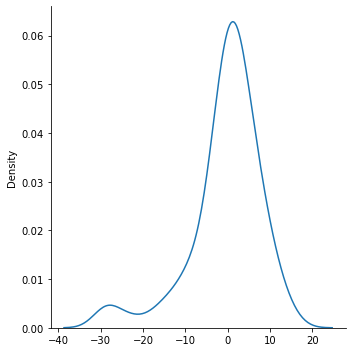

In [20]:
sns.displot(y_pred-y_test, kind = 'kde')

We can get the predicted response using the line equation as well

In [21]:
y_pred = model.intercept_ + model.coef_ * X_test

print(f"predicted response:\n{y_pred}")

predicted response:
[[21.07132827]
 [21.31153009]
 [20.69386826]
 [21.44116282]
 [20.29734461]
 [21.34965736]
 [20.94169554]
 [20.63667735]
 [20.98744826]
 [20.78537371]
 [20.91881917]
 [21.01795008]
 [20.37359916]
 [21.34965736]
 [21.13614463]
 [20.67480462]
 [20.80062462]
 [20.34691007]
 [21.40684827]
 [20.29734461]
 [21.24671372]
 [21.31153009]
 [20.9645719 ]
 [20.83112644]
 [20.27828098]
 [20.78918644]
 [21.34965736]
 [20.29734461]
 [21.15139554]
 [20.78537371]
 [21.07132827]
 [21.13614463]
 [20.45747916]
 [20.08001916]
 [20.78918644]
 [19.69493369]
 [21.22765009]
 [21.05226463]
 [21.15139554]
 [21.44116282]
 [20.78537371]
 [21.2162119 ]
 [21.42934336]
 [21.45641373]
 [21.15139554]
 [20.34691007]
 [20.9645719 ]
 [21.44116282]
 [20.80443735]
 [20.9645719 ]
 [21.01795008]
 [21.32716227]
 [20.9645719 ]
 [21.03320099]
 [20.82350099]
 [20.79299917]
 [20.19440098]
 [21.44878827]
 [21.30390463]
 [21.37253373]
 [21.28865372]
 [21.47929009]
 [21.09420463]
 [20.9645719 ]
 [21.44878827]
 [21.

# Let us see the scatter plot to see how the line behaves actually

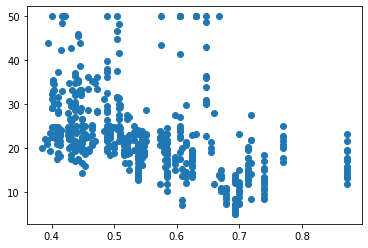

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x1,y)

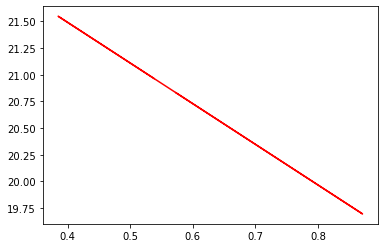

In [28]:
plt.plot(x1, model.intercept_ + model.coef_ * x1, 'r')

Text(0, 0.5, 'Y')

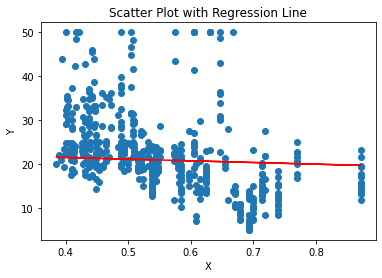

In [27]:
# Plotting these together

plt.scatter(x1,y)
plt.plot(x1, model.intercept_ + model.coef_ * x1, 'r')

# Customize the plot
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

We can see how the predictor is able to predict the line

Now we can go for the performance metric used in Linear regression which is known as R^2 and adjusted R^2

In [25]:
from sklearn.metrics import r2_score

In [26]:
R2 = r2_score(y_test, y_pred)
R2

0.044183072293439984

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse).

This may be due to too many outliers in this curve

Adjusted R^2 is not required as we just have one feature here,


Adjusted R^2 may be used when we have a lot of features